# Predicting the sale preices of Bulldozers using machine learning

In this notebook, we are going to go through an example of machine learning project with the goal of predicting the sale price of bulldozers.

## 1. Problem definition

>  How well can we predict the future sale price of a bulldozer , given its characteristics and previous examples of how much similar bulldozers will cost

## 2. Data

Data is downloaded from Kaggle Bluebook for bulldozers competition:https://www.kaggle.com/competitions/bluebook-for-bulldozers/data

There are 3 main datasets:

* Train.csv is the training set, which contains data through the end of 2011.

* Valid.csv is the validation set, which contains data from January 1, 2012 - April 30, 2012 You make predictions on this set throughout the majority of the competition. Your score on this set is used to create the public leaderboard.

* Test.csv is the test set, which won't be released until the last week of the competition. It contains data from May 1, 2012 - November 2012. Your score on the test set determines your final rank for the competition.

## 3. Evaluation

The evaluation metric for this competition is the RMSLE (root mean squared log error) between the actual and predicted auction prices.
 ** Note: ** The goal for most regression evaluation metrics is to minimize the error. The end goal of this project is to mininize the RMSLE.


## 4. Features

The data from Kaggle provides a dictionary detailing all of the features of the dataset.
The dictionary can be found here:https://www.kaggle.com/competitions/bluebook-for-bulldozers/data and under the dictionary.

In [117]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import sklearn
import seaborn as sns

In [118]:
# Importing training and validation data

df= pd.read_csv("data/bluebook-for-bulldozers/TrainAndValid.csv",low_memory=False)
df

,SalesID,SalePrice,MachineID,ModelID,datasource,auctioneerID,YearMade,MachineHoursCurrentMeter,UsageBand,saledate,...,Undercarriage_Pad_Width,Stick_Length,Thumb,Pattern_Changer,Grouser_Type,Backhoe_Mounting,Blade_Type,Travel_Controls,Differential_Type,Steering_Controls
0,1139246,66000.0,999089,3157,121,3.0,2004,68.0,Low,11/16/2006 0:00,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Standard,Conventional
1,1139248,57000.0,117657,77,121,3.0,1996,4640.0,Low,3/26/2004 0:00,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Standard,Conventional
2,1139249,10000.0,434808,7009,121,3.0,2001,2838.0,High,2/26/2004 0:00,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1139251,38500.0,1026470,332,121,3.0,2001,3486.0,High,5/19/2011 0:00,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1139253,11000.0,1057373,17311,121,3.0,2007,722.0,Medium,7/23/2009 0:00,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
412693,6333344,10000.0,1919201,21435,149,2.0,2005,NaN,NaN,3/7/2012 0:00,...,None or Unspecified,None or Unspecified,None or Unspecified,None or Unspecified,Double,NaN,NaN,NaN,NaN,NaN
412694,6333345,10500.0,1882122,21436,149,2.0,2005,NaN,NaN,1/28/2012 0:00,...,None or Unspecified,None or Unspecified,None or Unspecified,None or Unspecified,Double,NaN,NaN,NaN,NaN,NaN
412695,6333347,12500.0,1944213,21435,149,2.0,2005,NaN,NaN,1/28/2012 0:00,...,None or Unspecified,None or Unspecified,None or Unspecified,None or Unspecified,Double,NaN,NaN,NaN,NaN,NaN
412696,6333348,10000.0,1794518,21435,149,2.0,2006,NaN,NaN,3/7/2012 0:00,...,None or Unspecified,None or Unspecified,None or Unspecified,None or Unspecified,Double,NaN,NaN,NaN,NaN,NaN


In [119]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 412698 entries, 0 to 412697
Data columns (total 53 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   SalesID                   412698 non-null  int64  
 1   SalePrice                 412698 non-null  float64
 2   MachineID                 412698 non-null  int64  
 3   ModelID                   412698 non-null  int64  
 4   datasource                412698 non-null  int64  
 5   auctioneerID              392562 non-null  float64
 6   YearMade                  412698 non-null  int64  
 7   MachineHoursCurrentMeter  147504 non-null  float64
 8   UsageBand                 73670 non-null   object 
 9   saledate                  412698 non-null  object 
 10  fiModelDesc               412698 non-null  object 
 11  fiBaseModel               412698 non-null  object 
 12  fiSecondaryDesc           271971 non-null  object 
 13  fiModelSeries             58667 non-null   o

In [120]:
df.columns

Index(['SalesID', 'SalePrice', 'MachineID', 'ModelID', 'datasource',
       'auctioneerID', 'YearMade', 'MachineHoursCurrentMeter', 'UsageBand',
       'saledate', 'fiModelDesc', 'fiBaseModel', 'fiSecondaryDesc',
       'fiModelSeries', 'fiModelDescriptor', 'ProductSize',
       'fiProductClassDesc', 'state', 'ProductGroup', 'ProductGroupDesc',
       'Drive_System', 'Enclosure', 'Forks', 'Pad_Type', 'Ride_Control',
       'Stick', 'Transmission', 'Turbocharged', 'Blade_Extension',
       'Blade_Width', 'Enclosure_Type', 'Engine_Horsepower', 'Hydraulics',
       'Pushblock', 'Ripper', 'Scarifier', 'Tip_Control', 'Tire_Size',
       'Coupler', 'Coupler_System', 'Grouser_Tracks', 'Hydraulics_Flow',
       'Track_Type', 'Undercarriage_Pad_Width', 'Stick_Length', 'Thumb',
       'Pattern_Changer', 'Grouser_Type', 'Backhoe_Mounting', 'Blade_Type',
       'Travel_Controls', 'Differential_Type', 'Steering_Controls'],
      dtype='object')

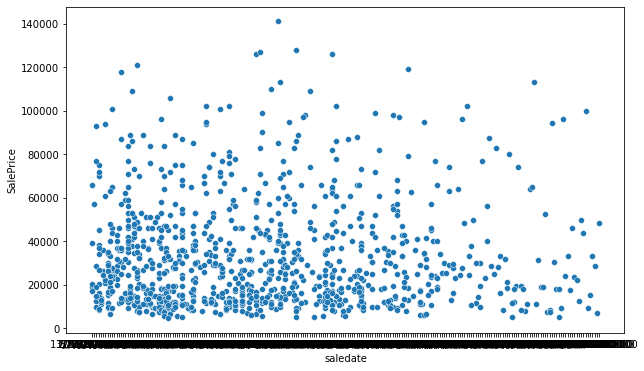

In [121]:
# Checking the saledate and saleprice scatter

plt.figure(figsize = (10,6))
sns.scatterplot(x=df.saledate[:1000],y=df.SalePrice[:1000]);

Text(0.5, 1.0, 'Frequency of Sale price')

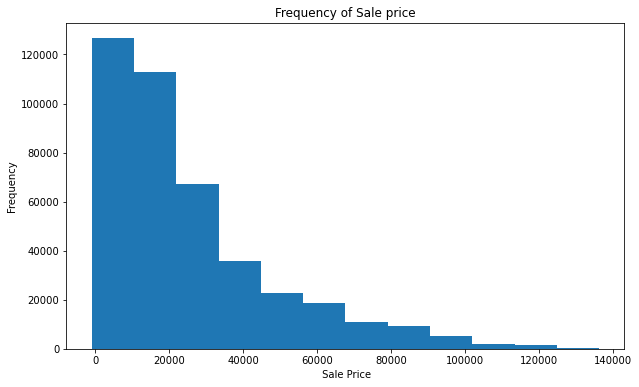

In [122]:
# Checking the frequencies of the sale price
plt.figure(figsize = (10,6))
plt.hist(x=df.SalePrice,bins =12,align='left')
plt.xlabel(" Sale Price")
plt.ylabel('Frequency')
plt.title('Frequency of Sale price')

In [123]:
df=pd.read_csv("data/bluebook-for-bulldozers/TrainAndValid.csv",low_memory=False,parse_dates=['saledate'])

In [124]:
df.saledate.dtype

dtype('<M8[ns]')

<AxesSubplot:xlabel='saledate', ylabel='SalePrice'>

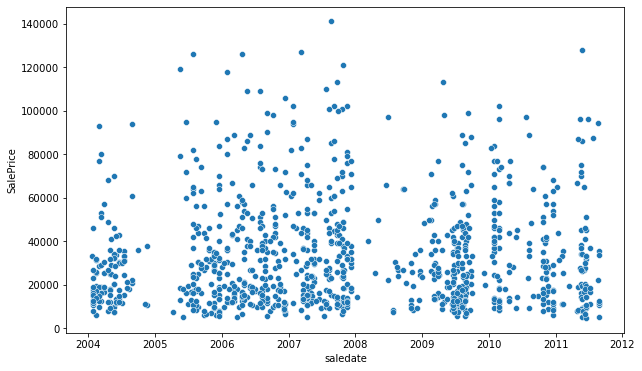

In [125]:
# Re-plotting the saledate and saleprice after changing the dataype of the saledate

plt.figure(figsize = (10,6))
sns.scatterplot(x=df.saledate[:1000],y=df.SalePrice[:1000])

#####  From the above scatter plot, the highest sold equipment was in 2007 and had a very few sale in 2008 which could potentially be due to the financial crisis

Since this is a time series data, it will be a good idea to sort the data by date

In [126]:
#Sort Datafram in date order
df.sort_values(by='saledate',ascending=True,inplace=True)
df.saledate.head(20)

205615   1989-01-17
274835   1989-01-31
141296   1989-01-31
212552   1989-01-31
62755    1989-01-31
54653    1989-01-31
81383    1989-01-31
204924   1989-01-31
135376   1989-01-31
113390   1989-01-31
113394   1989-01-31
116419   1989-01-31
32138    1989-01-31
127610   1989-01-31
76171    1989-01-31
127000   1989-01-31
128130   1989-01-31
127626   1989-01-31
55455    1989-01-31
55454    1989-01-31
Name: saledate, dtype: datetime64[ns]

In [127]:
# Making a copy of the orginal dataframe so when we manipulate the copy, we've still got our original data

df_temp = df.copy()

In [128]:
df_temp.head()

,SalesID,SalePrice,MachineID,ModelID,datasource,auctioneerID,YearMade,MachineHoursCurrentMeter,UsageBand,saledate,...,Undercarriage_Pad_Width,Stick_Length,Thumb,Pattern_Changer,Grouser_Type,Backhoe_Mounting,Blade_Type,Travel_Controls,Differential_Type,Steering_Controls
205615,1646770,9500.0,1126363,8434,132,18.0,1974,NaN,NaN,1989-01-17,...,NaN,NaN,NaN,NaN,NaN,None or Unspecified,Straight,None or Unspecified,NaN,NaN
274835,1821514,14000.0,1194089,10150,132,99.0,1980,NaN,NaN,1989-01-31,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Standard,Conventional
141296,1505138,50000.0,1473654,4139,132,99.0,1978,NaN,NaN,1989-01-31,...,NaN,NaN,NaN,NaN,NaN,None or Unspecified,Straight,None or Unspecified,NaN,NaN
212552,1671174,16000.0,1327630,8591,132,99.0,1980,NaN,NaN,1989-01-31,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Standard,Conventional
62755,1329056,22000.0,1336053,4089,132,99.0,1984,NaN,NaN,1989-01-31,...,NaN,NaN,NaN,NaN,NaN,None or Unspecified,PAT,Lever,NaN,NaN


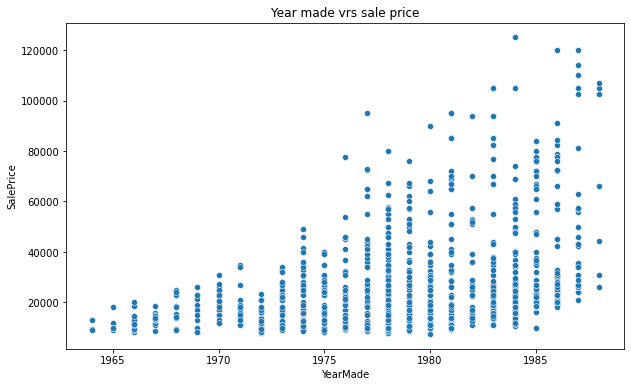

In [129]:
#Checking year made and sale price
plt.figure(figsize = (10,6))
sns.scatterplot(x=df.YearMade[:1000],y=df.SalePrice[:1000])
plt.title('Year made vrs sale price');

Slicing through the first 1000 rows of data shows the prices increase as they are newer.

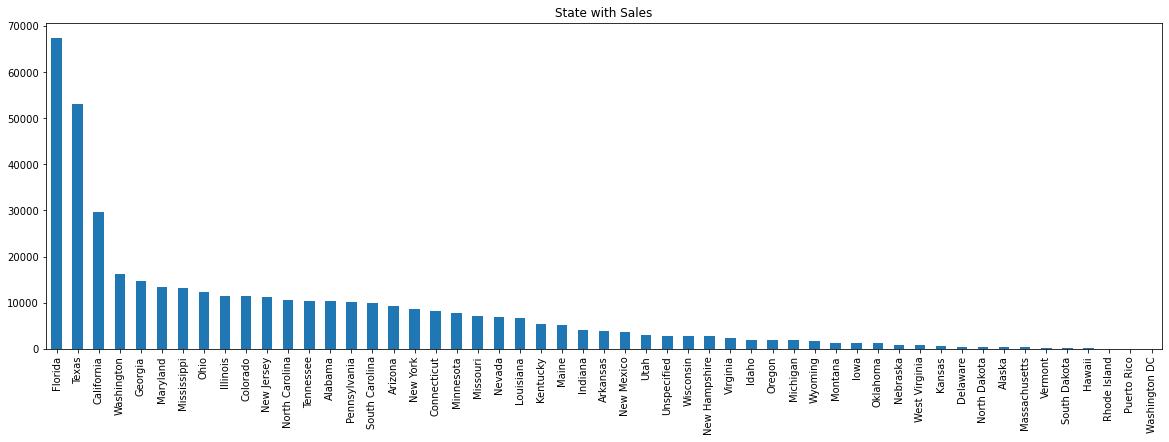

In [130]:
#Checking the States with much sales
plt.figure(figsize = (20,6))
df['state'].value_counts().plot(kind='bar')
plt.title('State with Sales')
plt.xticks(rotation=90);

### Add datetime parameters for saledate column

In [131]:
df_temp[:5].saledate.dt.month

205615    1
274835    1
141296    1
212552    1
62755     1
Name: saledate, dtype: int64

In [132]:
df_temp['saleYear']=df_temp.saledate.dt.year
df_temp['saleMonth']=df_temp.saledate.dt.month
df_temp['saleDay']=df_temp.saledate.dt.day
df_temp['saleDayOfWeek']=df_temp.saledate.dt.dayofweek
df_temp['saleDayOfYear']=df_temp.saledate.dt.dayofyear

In [133]:
df_temp.head().T

,205615,274835,141296,212552,62755
SalesID,1646770,1821514,1505138,1671174,1329056
SalePrice,9500.0,14000.0,50000.0,16000.0,22000.0
MachineID,1126363,1194089,1473654,1327630,1336053
ModelID,8434,10150,4139,8591,4089
datasource,132,132,132,132,132
auctioneerID,18.0,99.0,99.0,99.0,99.0
YearMade,1974,1980,1978,1980,1984
MachineHoursCurrentMeter,NaN,NaN,NaN,NaN,NaN
UsageBand,NaN,NaN,NaN,NaN,NaN
saledate,1989-01-17 00:00:00,1989-01-31 00:00:00,1989-01-31 00:00:00,1989-01-31 00:00:00,1989-01-31 00:00:00


In [134]:
# dropping the saledate column as we have already enriched our DataFrame with date attributes
df_temp.drop('saledate',axis=1,inplace=True)

## 5. Modelling

In [135]:
df_temp.isna().sum()

SalesID                          0
SalePrice                        0
MachineID                        0
ModelID                          0
datasource                       0
auctioneerID                 20136
YearMade                         0
MachineHoursCurrentMeter    265194
UsageBand                   339028
fiModelDesc                      0
fiBaseModel                      0
fiSecondaryDesc             140727
fiModelSeries               354031
fiModelDescriptor           337882
ProductSize                 216605
fiProductClassDesc               0
state                            0
ProductGroup                     0
ProductGroupDesc                 0
Drive_System                305611
Enclosure                      334
Forks                       214983
Pad_Type                    331602
Ride_Control                259970
Stick                       331602
Transmission                224691
Turbocharged                331602
Blade_Extension             386715
Blade_Width         

In [136]:
# Find the columns which contains strings
for label,content in df_temp.items():
    if pd.api.types.is_string_dtype(content):
        print(label)

UsageBand
fiModelDesc
fiBaseModel
fiSecondaryDesc
fiModelSeries
fiModelDescriptor
ProductSize
fiProductClassDesc
state
ProductGroup
ProductGroupDesc
Drive_System
Enclosure
Forks
Pad_Type
Ride_Control
Stick
Transmission
Turbocharged
Blade_Extension
Blade_Width
Enclosure_Type
Engine_Horsepower
Hydraulics
Pushblock
Ripper
Scarifier
Tip_Control
Tire_Size
Coupler
Coupler_System
Grouser_Tracks
Hydraulics_Flow
Track_Type
Undercarriage_Pad_Width
Stick_Length
Thumb
Pattern_Changer
Grouser_Type
Backhoe_Mounting
Blade_Type
Travel_Controls
Differential_Type
Steering_Controls


In [137]:
# Convert the string into categories and give them an order
for label,content in df_temp.items():
    if pd.api.types.is_string_dtype(content):
        df_temp[label]=content.astype("category").cat.as_ordered()

In [138]:
df_temp.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 412698 entries, 205615 to 409203
Data columns (total 57 columns):
 #   Column                    Non-Null Count   Dtype   
---  ------                    --------------   -----   
 0   SalesID                   412698 non-null  int64   
 1   SalePrice                 412698 non-null  float64 
 2   MachineID                 412698 non-null  int64   
 3   ModelID                   412698 non-null  int64   
 4   datasource                412698 non-null  int64   
 5   auctioneerID              392562 non-null  float64 
 6   YearMade                  412698 non-null  int64   
 7   MachineHoursCurrentMeter  147504 non-null  float64 
 8   UsageBand                 73670 non-null   category
 9   fiModelDesc               412698 non-null  category
 10  fiBaseModel               412698 non-null  category
 11  fiSecondaryDesc           271971 non-null  category
 12  fiModelSeries             58667 non-null   category
 13  fiModelDescriptor       

In [139]:
# Checking the state columns for their numnbers as already changed into category
df_temp.state.cat.codes

205615    43
274835     8
141296     8
212552     8
62755      8
          ..
410879     4
412476     4
411927     4
407124     4
409203     4
Length: 412698, dtype: int8

In [140]:
#Checking missing data with ratio

missing_percent =(df_temp.isnull().sum()/len(df_temp)) * 100
print(missing_percent,"%")

SalesID                      0.000000
SalePrice                    0.000000
MachineID                    0.000000
ModelID                      0.000000
datasource                   0.000000
auctioneerID                 4.879113
YearMade                     0.000000
MachineHoursCurrentMeter    64.258610
UsageBand                   82.149174
fiModelDesc                  0.000000
fiBaseModel                  0.000000
fiSecondaryDesc             34.099269
fiModelSeries               85.784520
fiModelDescriptor           81.871490
ProductSize                 52.485110
fiProductClassDesc           0.000000
state                        0.000000
ProductGroup                 0.000000
ProductGroupDesc             0.000000
Drive_System                74.051970
Enclosure                    0.080931
Forks                       52.092087
Pad_Type                    80.349796
Ride_Control                62.992794
Stick                       80.349796
Transmission                54.444412
Turbocharged

## Filling missing values

### Filling numeric missing values first

In [141]:
for label,content in df_temp.items():
    if pd.api.types.is_numeric_dtype(content):
        print(label)

SalesID
SalePrice
MachineID
ModelID
datasource
auctioneerID
YearMade
MachineHoursCurrentMeter
saleYear
saleMonth
saleDay
saleDayOfWeek
saleDayOfYear


In [142]:
# Check for which numeric columns have null values
for label,content in df_temp.items():
    if pd.api.types.is_numeric_dtype(content):
        if pd.isnull(content).sum():
            print(label)

auctioneerID
MachineHoursCurrentMeter


In [143]:
# Fill numeric rows with median
for label,content in df_temp.items():
    if pd.api.types.is_numeric_dtype(content):
        if pd.isnull(content).sum():
            # Add a binary column which tells us if the data was missing
            df_temp[label+"_is_missing"]=pd.isnull(content)
            #fill missing numeric values with median
            df_temp[label]=content.fillna(content.median())
            

In [144]:
# Check if there is any null numeric values
for loabel,content in df_temp.items():
    if pd.api.types.is_numeric_dtype(content):
        if pd.isnull(content).sum():
            print(label)

In [145]:
# Checking to see if the numeric coloumns has been filled.
df_temp['auctioneerID'].isnull().sum()
df_temp['MachineHoursCurrentMeter'].isnull().sum()

0

### filling and turning categorical variables into numbers


In [146]:
# Check for columns which aren't numeric
for label,content in df_temp.items():
    if not pd.api.types.is_numeric_dtype(content):
        print(label)

UsageBand
fiModelDesc
fiBaseModel
fiSecondaryDesc
fiModelSeries
fiModelDescriptor
ProductSize
fiProductClassDesc
state
ProductGroup
ProductGroupDesc
Drive_System
Enclosure
Forks
Pad_Type
Ride_Control
Stick
Transmission
Turbocharged
Blade_Extension
Blade_Width
Enclosure_Type
Engine_Horsepower
Hydraulics
Pushblock
Ripper
Scarifier
Tip_Control
Tire_Size
Coupler
Coupler_System
Grouser_Tracks
Hydraulics_Flow
Track_Type
Undercarriage_Pad_Width
Stick_Length
Thumb
Pattern_Changer
Grouser_Type
Backhoe_Mounting
Blade_Type
Travel_Controls
Differential_Type
Steering_Controls


In [147]:
# Turn categorical variables into numbers and fill missing
for label,content in df_temp.items():
    if not pd.api.types.is_numeric_dtype(content):
    # Add binary column to indicate whether sample had missing value
        df_temp[label+'_is_missing']=pd.isnull(content)
    
    # Turn categories into numbers and add +1
        df_temp[label]=pd.Categorical(content).codes+1

In [148]:
df_temp.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 412698 entries, 205615 to 409203
Columns: 103 entries, SalesID to Steering_Controls_is_missing
dtypes: bool(46), float64(3), int16(4), int64(10), int8(40)
memory usage: 81.1 MB


In [149]:
df_temp.head().T

,205615,274835,141296,212552,62755
SalesID,1646770,1821514,1505138,1671174,1329056
SalePrice,9500.0,14000.0,50000.0,16000.0,22000.0
MachineID,1126363,1194089,1473654,1327630,1336053
ModelID,8434,10150,4139,8591,4089
datasource,132,132,132,132,132
...,...,...,...,...,...
Backhoe_Mounting_is_missing,False,True,False,True,False
Blade_Type_is_missing,False,True,False,True,False
Travel_Controls_is_missing,False,True,False,True,False
Differential_Type_is_missing,True,False,True,False,True


In [150]:
#Checking to see any null in any of the columns
df_temp.isna().sum()

SalesID                         0
SalePrice                       0
MachineID                       0
ModelID                         0
datasource                      0
                               ..
Backhoe_Mounting_is_missing     0
Blade_Type_is_missing           0
Travel_Controls_is_missing      0
Differential_Type_is_missing    0
Steering_Controls_is_missing    0
Length: 103, dtype: int64

In [151]:
df_temp

,SalesID,SalePrice,MachineID,ModelID,datasource,auctioneerID,YearMade,MachineHoursCurrentMeter,UsageBand,fiModelDesc,...,Undercarriage_Pad_Width_is_missing,Stick_Length_is_missing,Thumb_is_missing,Pattern_Changer_is_missing,Grouser_Type_is_missing,Backhoe_Mounting_is_missing,Blade_Type_is_missing,Travel_Controls_is_missing,Differential_Type_is_missing,Steering_Controls_is_missing
205615,1646770,9500.0,1126363,8434,132,18.0,1974,0.0,0,4593,...,True,True,True,True,True,False,False,False,True,True
274835,1821514,14000.0,1194089,10150,132,99.0,1980,0.0,0,1820,...,True,True,True,True,True,True,True,True,False,False
141296,1505138,50000.0,1473654,4139,132,99.0,1978,0.0,0,2348,...,True,True,True,True,True,False,False,False,True,True
212552,1671174,16000.0,1327630,8591,132,99.0,1980,0.0,0,1819,...,True,True,True,True,True,True,True,True,False,False
62755,1329056,22000.0,1336053,4089,132,99.0,1984,0.0,0,2119,...,True,True,True,True,True,False,False,False,True,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
410879,6302984,16000.0,1915521,5266,149,99.0,2001,0.0,0,2101,...,True,True,True,True,True,False,False,False,True,True
412476,6324811,6000.0,1919104,19330,149,99.0,2004,0.0,0,240,...,True,True,True,True,True,True,True,True,True,True
411927,6313029,16000.0,1918416,17244,149,99.0,2004,0.0,0,627,...,True,True,True,True,True,True,True,True,True,True
407124,6266251,55000.0,509560,3357,149,99.0,1993,0.0,0,83,...,True,True,True,True,True,True,True,True,True,True


In [152]:
%%time
from sklearn.ensemble import RandomForestRegressor

#Instantiate model 
model=RandomForestRegressor(n_jobs=-1,random_state=42)

#Fit the model
model.fit(df_temp.drop("SalePrice",axis=1),df_temp['SalePrice'])

Wall time: 1min 11s


RandomForestRegressor(n_jobs=-1, random_state=42)

In [153]:
# Score the model
model.score(df_temp.drop("SalePrice",axis=1),df_temp['SalePrice'])

0.9875468079970562

## splitting data into train/validation sets


In [154]:
df_temp.saleYear

205615    1989
274835    1989
141296    1989
212552    1989
62755     1989
          ... 
410879    2012
412476    2012
411927    2012
407124    2012
409203    2012
Name: saleYear, Length: 412698, dtype: int64

In [155]:
#Split data into training and validation
df_val= df_temp[df_temp.saleYear==2012]
df_train=df_temp[df_temp.saleYear!=2012]

len(df_val),len(df_train)

(11573, 401125)

In [156]:
#Split data into x & Y
X_train,y_train=df_train.drop("SalePrice",axis=1),df_train.SalePrice
X_valid,y_valid=df_val.drop('SalePrice',axis=1),df_val.SalePrice

X_train.shape,y_train.shape,X_valid.shape,y_valid.shape

((401125, 102), (401125,), (11573, 102), (11573,))

### Building an evaluation function

In [157]:
#Create evaluation function(the competition usese RMSLE)

from sklearn.metrics import mean_squared_log_error,mean_absolute_error,r2_score

def rmsle(y_test,y_preds):
    """
    calculates root mean squared log error between predictions and true labels.
    """
    return np.sqrt(mean_squared_log_error(y_test,y_preds))


#Create function to evaluate model on a few different levels
def show_scores(model):
    train_preds=model.predict(X_train)
    val_preds=model.predict(X_valid)
    scores={'Training MAE':mean_absolute_error(y_train,train_preds),
           "Valid MAE":mean_absolute_error(y_valid,val_preds),
           "training RMSLE": rmsle(y_train,train_preds),
           "Valid RMSLE":rmsle(y_valid,val_preds),
           "Training R^2":r2_score(y_train,train_preds),
           "valid R^2":r2_score(y_valid,val_preds)}
    
    return scores

## Testing our model on a subset(to tune the hyperparameters)

In [158]:
model=RandomForestRegressor(n_jobs=-1,
                            random_state=42)

model.fit(X_train,y_train)

RandomForestRegressor(n_jobs=-1, random_state=42)

In [159]:
# Change max_samples value

model=RandomForestRegressor(n_jobs=-1,random_state=42,max_samples=10000)
model

RandomForestRegressor(max_samples=10000, n_jobs=-1, random_state=42)

In [160]:
%%time
model.fit(X_train,y_train)

Wall time: 2.37 s


RandomForestRegressor(max_samples=10000, n_jobs=-1, random_state=42)

In [161]:
show_scores(model)

{'Training MAE': 5561.2988092240585,
 'Valid MAE': 7177.26365505919,
 'training RMSLE': 0.257745378256977,
 'Valid RMSLE': 0.29362638671089003,
 'Training R^2': 0.8606658995199189,
 'valid R^2': 0.8320374995090507}

## Hyperparameter tuning with RandomizedSearchCV

In [162]:
%%time
from sklearn.model_selection import RandomizedSearchCV

# Different RandomForestRegressor Hyperparameters
rf_grid={'n_estimators':np.arange(10,100,10),
        "max_depth":[None,3,4,5,10],
        "min_samples_split":np.arange(2,20,2),
        "min_samples_leaf":np.arange(1,20,2),
        "max_samples":[10000]}

# instantiate randomizedsearchCV model
rs_model=RandomizedSearchCV(RandomForestRegressor(n_jobs=-1,random_state=42),
                           param_distributions=rf_grid,
                           n_iter=100,
                           cv=5,
                           verbose=True)

#Fit the randomizedsearchcv mode;
rs_model.fit(X_train,y_train)

Fitting 5 folds for each of 100 candidates, totalling 500 fits
Wall time: 12min 34s


RandomizedSearchCV(cv=5,
                   estimator=RandomForestRegressor(n_jobs=-1, random_state=42),
                   n_iter=100,
                   param_distributions={'max_depth': [None, 3, 4, 5, 10],
                                        'max_samples': [10000],
                                        'min_samples_leaf': array([ 1,  3,  5,  7,  9, 11, 13, 15, 17, 19]),
                                        'min_samples_split': array([ 2,  4,  6,  8, 10, 12, 14, 16, 18]),
                                        'n_estimators': array([10, 20, 30, 40, 50, 60, 70, 80, 90])},
                   verbose=True)

In [163]:
# Find the best model hyperparameters
print(rs_model.best_params_,rs_model.best_score_)

{'n_estimators': 30, 'min_samples_split': 8, 'min_samples_leaf': 1, 'max_samples': 10000, 'max_depth': None} 0.749532095685159


In [164]:
#Evaluate the randomizedSearchCV model

show_scores(rs_model)

{'Training MAE': 5744.24676643999,
 'Valid MAE': 7353.621674825138,
 'training RMSLE': 0.26397137636824264,
 'Valid RMSLE': 0.29981326876548015,
 'Training R^2': 0.8510256251941661,
 'valid R^2': 0.8230445653491667}

### Train modle with the best hyperparameters
This was done with 100 parameters

In [165]:
%%time
# Most ideal hyperparameters
ideal_model=RandomForestRegressor(n_estimators=30,
                                 min_samples_leaf=1,
                                 min_samples_split=4,
                                 n_jobs=-1,
                                 max_samples=None,
                                 random_state=42)

# Fit ideal model
ideal_model.fit(X_train,y_train)

Wall time: 22.6 s


RandomForestRegressor(min_samples_split=4, n_estimators=30, n_jobs=-1,
                      random_state=42)

In [166]:
# show_scores for ideal_model(trained on all the data)
show_scores(ideal_model)

{'Training MAE': 1814.3427180990975,
 'Valid MAE': 6195.5398094699985,
 'training RMSLE': 0.0968582829811689,
 'Valid RMSLE': 0.25882692406387714,
 'Training R^2': 0.9826274777453372,
 'valid R^2': 0.8691843613102863}

## make predictions on test Data

In [182]:
#import the test data
df_test=pd.read_csv('data/bluebook-for-bulldozers/Test.csv',low_memory=False,
                   parse_dates=['saledate'])
df_test.head()

,SalesID,MachineID,ModelID,datasource,auctioneerID,YearMade,MachineHoursCurrentMeter,UsageBand,saledate,fiModelDesc,...,Undercarriage_Pad_Width,Stick_Length,Thumb,Pattern_Changer,Grouser_Type,Backhoe_Mounting,Blade_Type,Travel_Controls,Differential_Type,Steering_Controls
0,1227829,1006309,3168,121,3,1999,3688.0,Low,2012-05-03,580G,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1227844,1022817,7271,121,3,1000,28555.0,High,2012-05-10,936,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Standard,Conventional
2,1227847,1031560,22805,121,3,2004,6038.0,Medium,2012-05-10,EC210BLC,...,None or Unspecified,"9' 6""",Manual,None or Unspecified,Double,NaN,NaN,NaN,NaN,NaN
3,1227848,56204,1269,121,3,2006,8940.0,High,2012-05-10,330CL,...,None or Unspecified,None or Unspecified,Manual,Yes,Triple,NaN,NaN,NaN,NaN,NaN
4,1227863,1053887,22312,121,3,2005,2286.0,Low,2012-05-10,650K,...,NaN,NaN,NaN,NaN,NaN,None or Unspecified,PAT,None or Unspecified,NaN,NaN


## Preprocessing the data (getting the test datset in the same format as our training dataset)

In [183]:
def preprocess_data(df):
    """
    Performs transformations on df and returns transformed df.
    """
    df['saleYear']=df.saledate.dt.year
    df['saleMonth']=df.saledate.dt.month
    df['saleDay']=df.saledate.dt.day
    df['saleDayOfWeek']=df.saledate.dt.dayofweek
    df['saleDayOfYear']=df.saledate.dt.dayofyear
    
    df.drop('saledate',axis=1,inplace=True)
    
    #Fill the numeric rows with median
    
    for label,content in df.items():
        if pd.api.types.is_numeric_dtype(content):
            if pd.isnull(content).sum():
            # Add a binary column which tells us if the data was missing
                df[label+"_is_missing"]=pd.isnull(content)
            
            #fill missing numeric values with median
                df[label]=content.fillna(content.median())
            
    #Fill categorical missing data and turn categorical data in numbers
        if not pd.api.types.is_numeric_dtype(content):
            df[label+"_is_missing"] =pd.isnull(content)
        #We add +1 to the category code because pandas encodes missing categories as -1
            df[label]=pd.Categorical(content).codes+1
        
    return df

In [184]:
# Make prediction on the test dataset
df_test=preprocess_data(df_test)
df_test.head()

,SalesID,MachineID,ModelID,datasource,auctioneerID,YearMade,MachineHoursCurrentMeter,UsageBand,fiModelDesc,fiBaseModel,...,Undercarriage_Pad_Width_is_missing,Stick_Length_is_missing,Thumb_is_missing,Pattern_Changer_is_missing,Grouser_Type_is_missing,Backhoe_Mounting_is_missing,Blade_Type_is_missing,Travel_Controls_is_missing,Differential_Type_is_missing,Steering_Controls_is_missing
0,1227829,1006309,3168,121,3,1999,3688.0,2,499,180,...,True,True,True,True,True,True,True,True,True,True
1,1227844,1022817,7271,121,3,1000,28555.0,1,831,292,...,True,True,True,True,True,True,True,True,False,False
2,1227847,1031560,22805,121,3,2004,6038.0,3,1177,404,...,False,False,False,False,False,True,True,True,True,True
3,1227848,56204,1269,121,3,2006,8940.0,1,287,113,...,False,False,False,False,False,True,True,True,True,True
4,1227863,1053887,22312,121,3,2005,2286.0,2,566,196,...,True,True,True,True,True,False,False,False,True,True


In [185]:
X_train.head()

,SalesID,MachineID,ModelID,datasource,auctioneerID,YearMade,MachineHoursCurrentMeter,UsageBand,fiModelDesc,fiBaseModel,...,Undercarriage_Pad_Width_is_missing,Stick_Length_is_missing,Thumb_is_missing,Pattern_Changer_is_missing,Grouser_Type_is_missing,Backhoe_Mounting_is_missing,Blade_Type_is_missing,Travel_Controls_is_missing,Differential_Type_is_missing,Steering_Controls_is_missing
205615,1646770,1126363,8434,132,18.0,1974,0.0,0,4593,1744,...,True,True,True,True,True,False,False,False,True,True
274835,1821514,1194089,10150,132,99.0,1980,0.0,0,1820,559,...,True,True,True,True,True,True,True,True,False,False
141296,1505138,1473654,4139,132,99.0,1978,0.0,0,2348,713,...,True,True,True,True,True,False,False,False,True,True
212552,1671174,1327630,8591,132,99.0,1980,0.0,0,1819,558,...,True,True,True,True,True,True,True,True,False,False
62755,1329056,1336053,4089,132,99.0,1984,0.0,0,2119,683,...,True,True,True,True,True,False,False,False,True,True


In [186]:
# We can find how the columns differ using sets
set(X_train.columns)-set(df_test.columns)

{'auctioneerID_is_missing'}

In [187]:
# manually adjest df-test to have auctioneerID-is_missing column
df_test['auctioneerID_is_missing']=False
df_test.head()

,SalesID,MachineID,ModelID,datasource,auctioneerID,YearMade,MachineHoursCurrentMeter,UsageBand,fiModelDesc,fiBaseModel,...,Stick_Length_is_missing,Thumb_is_missing,Pattern_Changer_is_missing,Grouser_Type_is_missing,Backhoe_Mounting_is_missing,Blade_Type_is_missing,Travel_Controls_is_missing,Differential_Type_is_missing,Steering_Controls_is_missing,auctioneerID_is_missing
0,1227829,1006309,3168,121,3,1999,3688.0,2,499,180,...,True,True,True,True,True,True,True,True,True,False
1,1227844,1022817,7271,121,3,1000,28555.0,1,831,292,...,True,True,True,True,True,True,True,False,False,False
2,1227847,1031560,22805,121,3,2004,6038.0,3,1177,404,...,False,False,False,False,True,True,True,True,True,False
3,1227848,56204,1269,121,3,2006,8940.0,1,287,113,...,False,False,False,False,True,True,True,True,True,False
4,1227863,1053887,22312,121,3,2005,2286.0,2,566,196,...,True,True,True,True,False,False,False,True,True,False


Finally our test data is the same as the training dataframe we can make predictions

In [188]:
#make predictions on the test data
test_preds=ideal_model.predict(df_test);
test_preds

C:\Users\gamponsa\Anaconda3\lib\site-packages\sklearn\base.py:493: FutureWarning: The feature names should match those that were passed during fit. Starting version 1.2, an error will be raised.
Feature names must be in the same order as they were in fit.

  warnings.warn(message, FutureWarning)


array([20189.44444444, 24861.22222222, 49856.26984127, ...,
       12282.36111111, 17862.5       , 30320.61507937])

In [189]:
# Format predictions into the same format kaggle is after
df_preds=pd.DataFrame()

df_preds['SalesID']=df_test['SalesID']
df_preds['SalePrice']=test_preds
print(df_preds)

       SalesID     SalePrice
0      1227829  20189.444444
1      1227844  24861.222222
2      1227847  49856.269841
3      1227848  77885.000000
4      1227863  40138.611111
...        ...           ...
12452  6643171  58989.444444
12453  6643173  11704.583333
12454  6643184  12282.361111
12455  6643186  17862.500000
12456  6643196  30320.615079

[12457 rows x 2 columns]


## Featue Importance

In [190]:
#Find feature importance of our best model
ideal_model.feature_importances_

array([4.92355257e-02, 1.59633479e-02, 3.29865806e-02, 3.55213164e-04,
       4.29601027e-03, 2.62874432e-01, 3.20203748e-03, 1.09798570e-03,
       1.99090909e-02, 7.66857719e-02, 5.18533064e-02, 4.42880263e-03,
       3.50005615e-03, 2.29068393e-01, 3.94529418e-02, 8.59323395e-03,
       1.71993963e-04, 2.03948008e-04, 1.68307429e-03, 8.88999413e-03,
       3.85152373e-04, 3.65395779e-05, 5.05121516e-04, 1.70531916e-04,
       1.63570270e-03, 2.74477257e-05, 3.83938926e-05, 7.94016222e-03,
       2.13341351e-04, 5.06391456e-05, 3.79608021e-03, 1.80269247e-03,
       2.28994751e-03, 2.73014267e-03, 2.28371107e-04, 1.56359164e-03,
       9.99232682e-04, 1.89878228e-02, 5.57261022e-06, 3.03592678e-06,
       1.68025801e-04, 1.06996900e-03, 1.28289847e-03, 7.19910688e-04,
       2.34383161e-04, 4.38128232e-04, 2.41153665e-04, 1.63890289e-03,
       7.72754531e-04, 1.74197633e-04, 1.72100829e-04, 7.66482107e-02,
       3.06288442e-03, 8.78512137e-03, 4.27776506e-03, 1.43911655e-02,
      

In [191]:
#Helper function for plotting feature importance
def plot_features(columns,importances,n=20):
    df=(pd.DataFrame({"features":columns,
                    "feature_importances":importances})
    .sort_values("feature_importances",ascending=False)
    .reset_index(drop=True))
    
    #plot the dataframe
    fig,ax=plt.subplots()
    ax.barh(df['features'][:n],df['feature_importances'][:20])
    ax.set_ylabel("Features")
    ax.set_xlabel('Feature importance')
    

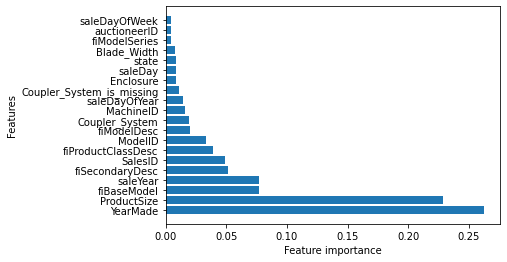

In [192]:
plot_features(X_train.columns,ideal_model.feature_importances_)